# 

# Breakdown of this notebook:
1) **Importing the Libraries**

2) **Loading the dataset**

3) **Understanding the Attrition Problem and the Dataset**

4) **Data Visualization:**   
   - Plot a correlation map for all numeric variables
   - Overtime
   - Marital Status
   - Job Role
   - Gender
   - Education Field
   - Department
   - Buisness Travel
   - Relation between Overtime and Age
   - Total Working Years
   - Education Level
   - Number of Companies Worked
   - Distance from Home

5) **Prediction of Attrition**: LGBM Classifier

# 1. import the necessary libraries

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
from pandas.plotting import scatter_matrix
import os
import warnings
warnings.filterwarnings('ignore')

# 2.Loading the dataset

In [5]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [6]:
df.head() #first 5 data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [7]:
df.tail() #last 5 data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [8]:
df.info() #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

# 3. Describe the dataset

In [11]:
df.describe() ## Generate descriptive statistics that summarize the central tendency,dispersion and shape of a dataset's distribution

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Understanding the Attrition Problem and the Dataset


 HR Analytics helps us with interpreting organizational data. It finds out the people-related trends in the data and helps the HR Department take the appropriate steps to keep the organization running smoothly and profitably.Attrition is a corporate setup is one of the complex challenges that the people managers and the HRs personnel have to deal with. 
 
 Interestingly, machine learning models can be deployed to predict potential attrition cases, thereby helping the appropriate HR Personnel take the necessary steps to retain the employee.

# Plot a correlation map for all numeric variables

<AxesSubplot:>

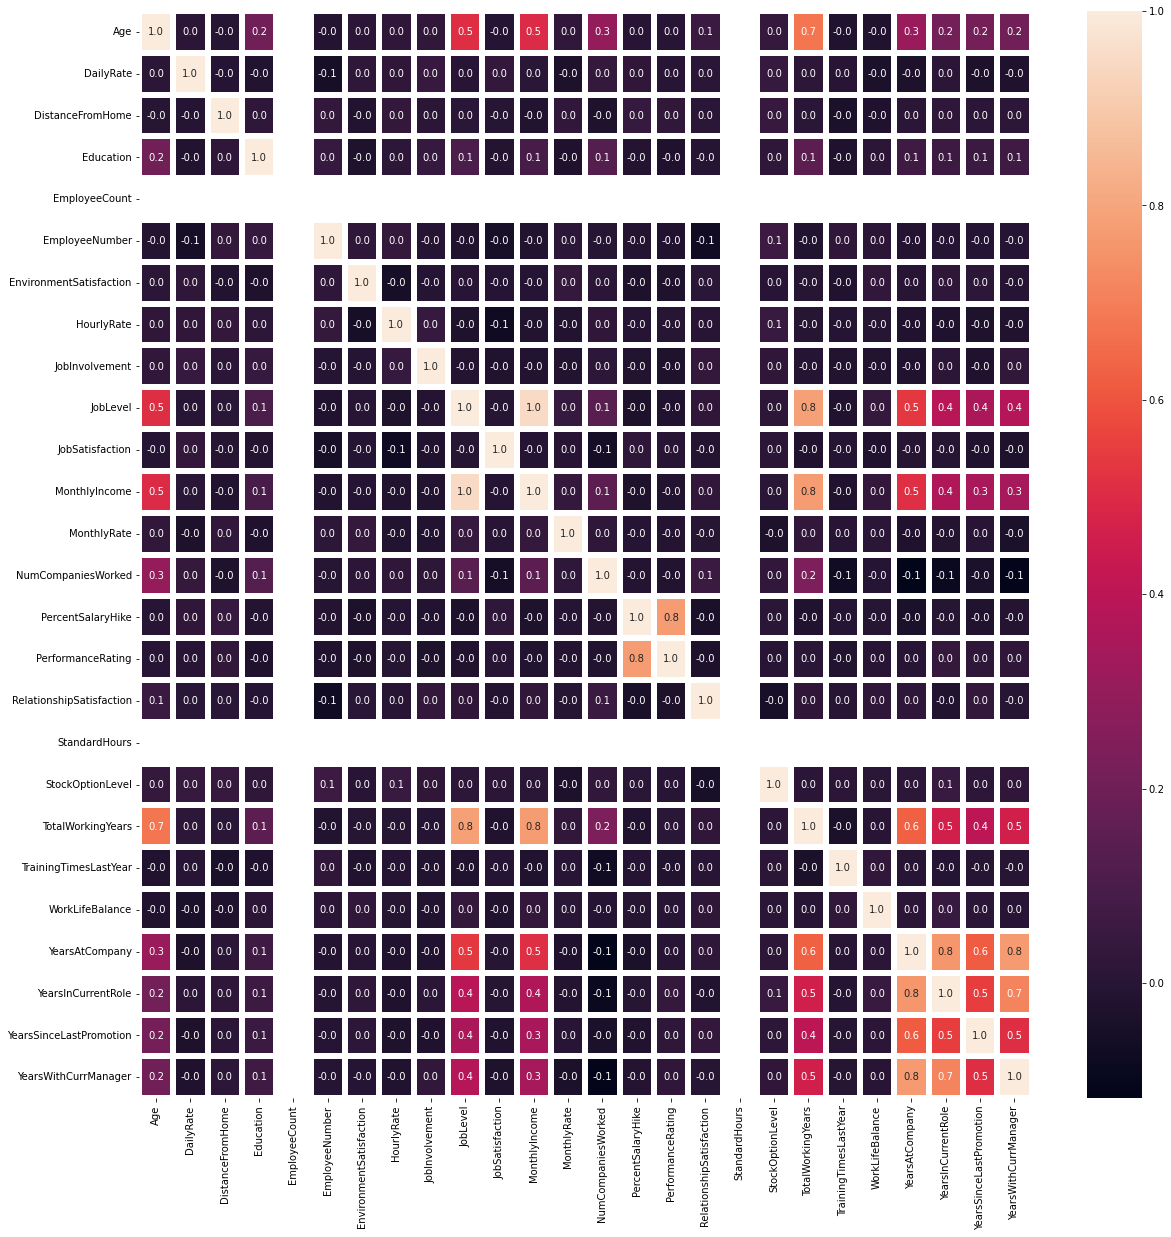

In [16]:
f,ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,linewidths=6,fmt='.1f',ax=ax)

# we had now explore the number of people based on different criteria to see which criteria is the dominant one for attrition

Text(0.5, 1.0, 'OverTime')

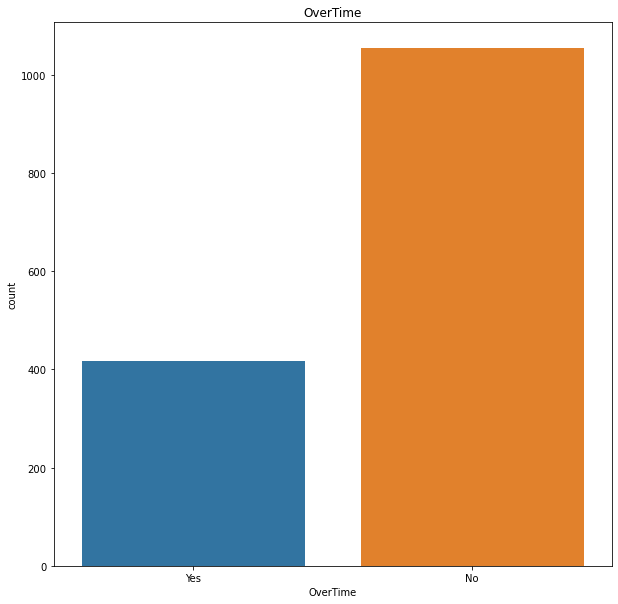

In [19]:
# count of people doing overtime
sns.countplot(df['OverTime'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('OverTime')

# the Count of people doing overtime < the count of people not doing overtime

Text(0.5, 1.0, 'Marital Status')

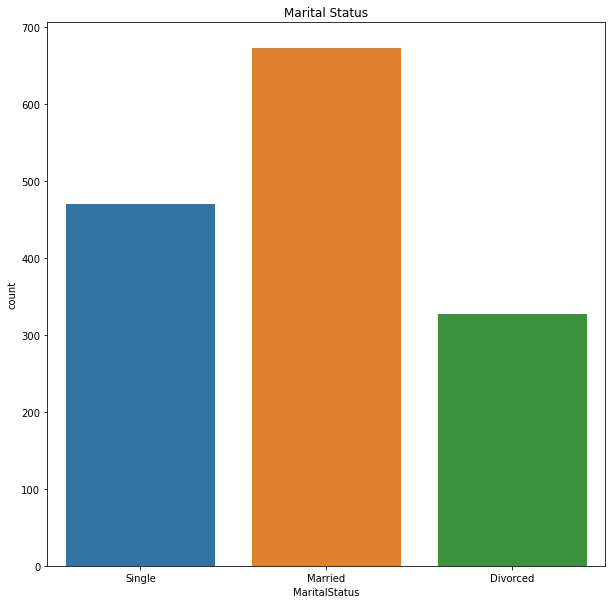

In [21]:
#count of people based on their marital status
sns.countplot(df['MaritalStatus'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Marital Status')

Text(0.5, 1.0, 'Job Role')

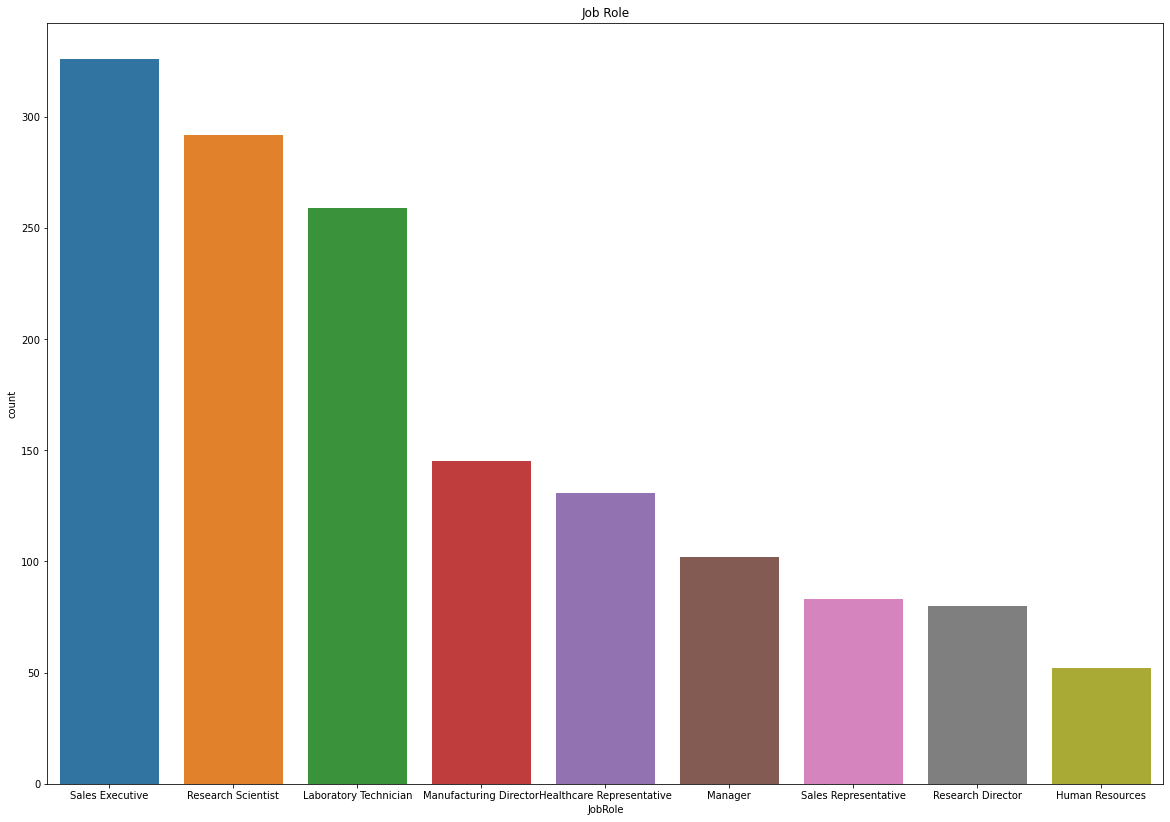

In [22]:
#count of people based on their Jobrole
sns.countplot(df['JobRole'])
fig = plt.gcf()
fig.set_size_inches(20,14)
plt.title('Job Role')

Text(0.5, 1.0, 'Gender')

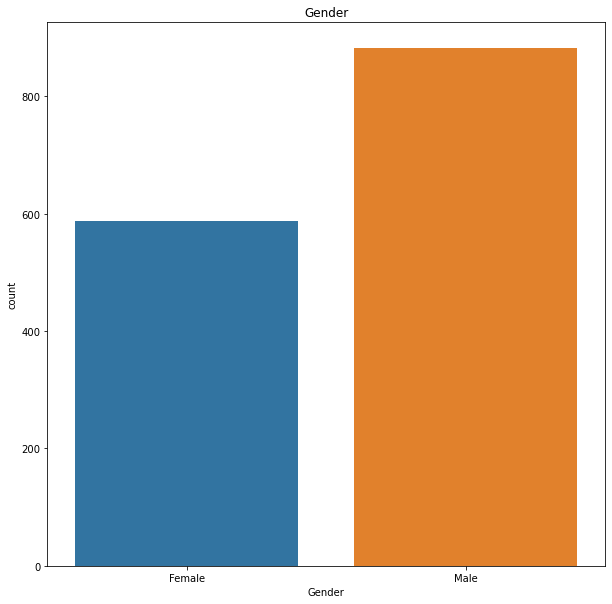

In [23]:
#count of people based on their Gender
sns.countplot(df['Gender'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Gender')

Text(0.5, 1.0, 'Education Field')

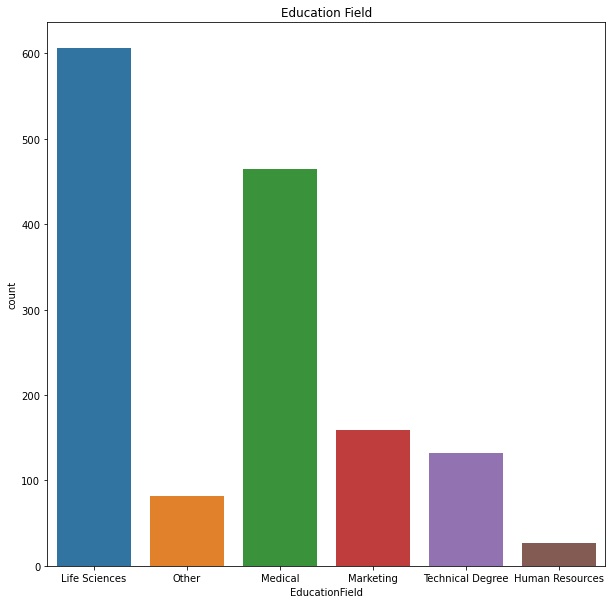

In [24]:
#count of people based on their field of education
sns.countplot(df['EducationField'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Education Field')

Text(0.5, 1.0, 'Department')

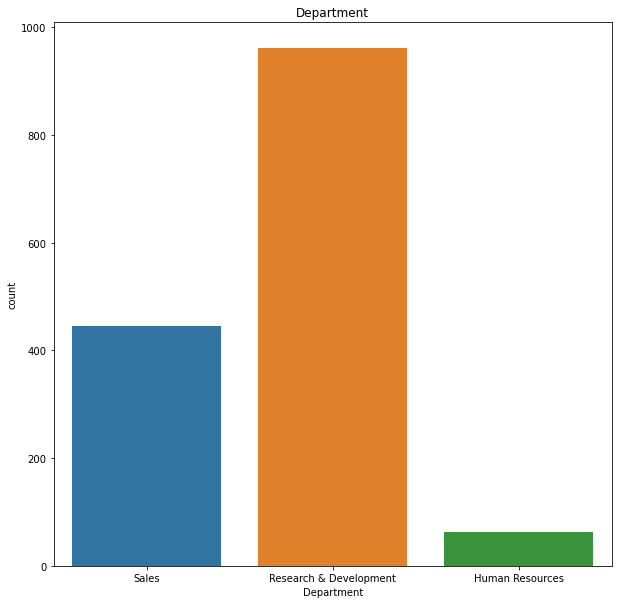

In [25]:
#count of people based on the department in which they work
sns.countplot(df['Department'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Department')

Text(0.5, 1.0, 'Department')

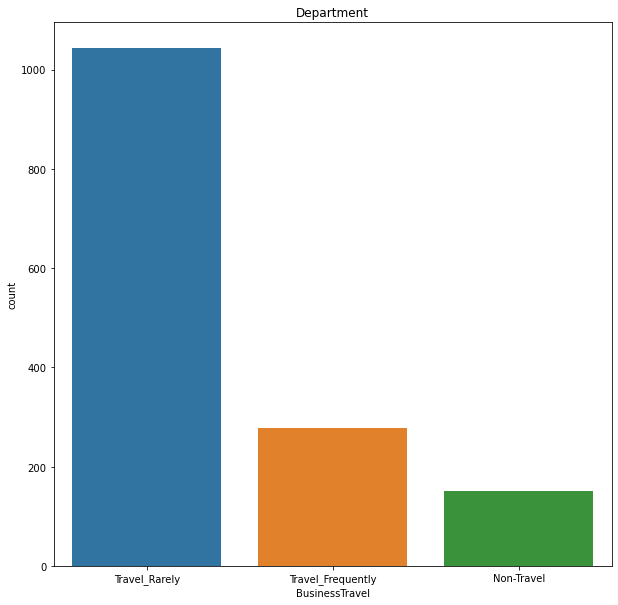

In [26]:
#count of people based on their Travel Frequency
sns.countplot(df['BusinessTravel'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Department')

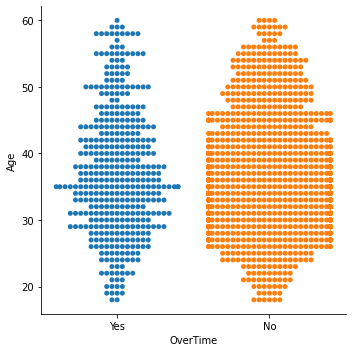

In [28]:
# analyzing the age group of the peole doing overtime
sns.catplot(x="OverTime", y="Age", kind="swarm", data=df);

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

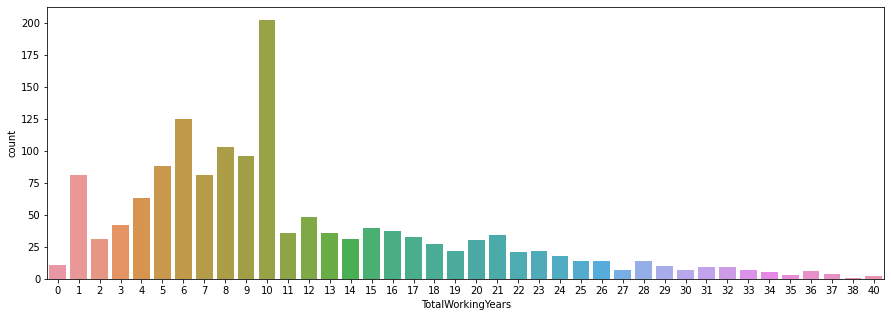

In [29]:
#count of people based on their total working years
plt.subplots(figsize=(15,5))
sns.countplot(df.TotalWorkingYears)

<AxesSubplot:xlabel='Education', ylabel='count'>

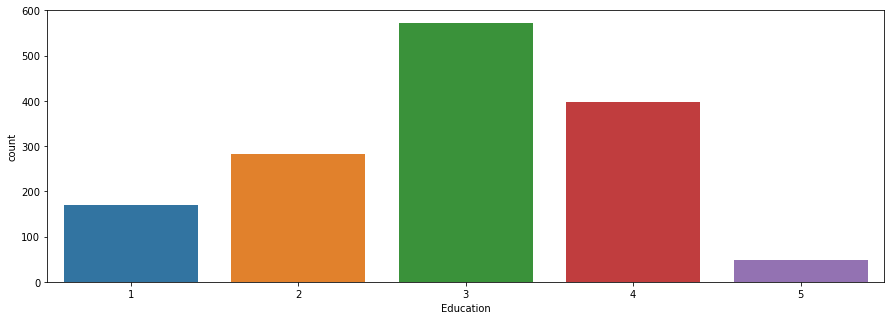

In [30]:
#count of people based on their Education
plt.subplots(figsize=(15,5))
sns.countplot(df.Education)

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

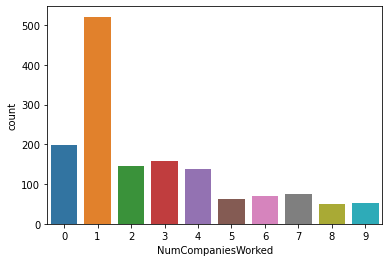

In [32]:
#count of people based on the number of companies they have worked for
sns.countplot(df.NumCompaniesWorked)

<AxesSubplot:xlabel='DistanceFromHome', ylabel='count'>

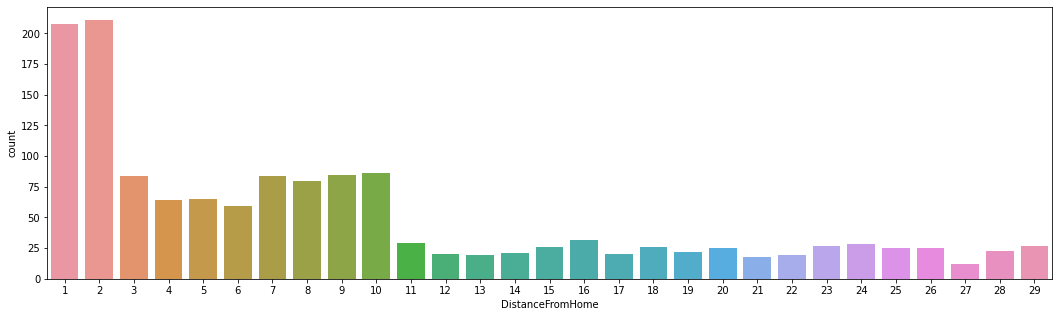

In [34]:
#count of people based on the distance from home they are working
plt.subplots(figsize=(18,5))
sns.countplot(df.DistanceFromHome)

In [40]:
#!pip3 install lightgbm
#!pip3 install xgboost
#!pip3 install catboost
#!pip3 install hyperopt

     ---------------------------------------- 1.6/1.6 MB 9.1 MB/s eta 0:00:00
     ------------------------------------- 199.7/199.7 kB 11.8 MB/s eta 0:00:00


In [41]:
import time
import math
import seaborn as sns
import pandas as pd
import numpy as np
import scipy as sci
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from hyperopt import hp, tpe, Trials, STATUS_OK
from hyperopt import fmin

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight') 
%matplotlib inline

In [43]:
ibm_df = df # copying data to ibm_df
ibm_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [44]:
description = pd.DataFrame(index=['observations(rows)', 'percent missing', 'dtype', 'range']) # creating a dataframe with custom indices

In [45]:
# initializing empty lists
numerical = []
categorical = []


for col in ibm_df.columns:
    obs = ibm_df[col].size
    p_nan = round(ibm_df[col].isna().sum()/obs, 2) # caluclating the number of missing values
    num_nan = f'{p_nan}% ({ibm_df[col].isna().sum()}/{obs})' # caluclating the number of missing values
    dtype = 'categorical' if ibm_df[col].dtype == object else 'numerical' # defining the criteria for numerical and categorical columns
    numerical.append(col) if dtype == 'numerical' else categorical.append(col) # preparing the list of categorcal and numerical columns
    rng = f'{len(ibm_df[col].unique())} labels' if dtype == 'categorical' else f'{ibm_df[col].min()}-{ibm_df[col].max()}' # the range of values in the columns
    description[col] = [obs, num_nan, dtype, rng]

In [46]:
numerical.remove('EmployeeCount') # removing EmployeeCount from numerical columns
numerical.remove('StandardHours') # removing StandardHours from numerical columns
pd.set_option('display.max_columns', 100) # displaying 100 columns atmost
display(description)
display(ibm_df.head())

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
observations(rows),1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470,1470
percent missing,0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470),0.0% (0/1470)
dtype,numerical,categorical,categorical,numerical,categorical,numerical,numerical,categorical,numerical,numerical,numerical,categorical,numerical,numerical,numerical,categorical,numerical,categorical,numerical,numerical,numerical,categorical,categorical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical,numerical
range,18-60,2 labels,3 labels,102-1499,3 labels,1-29,1-5,6 labels,1-1,1-2068,1-4,2 labels,30-100,1-4,1-5,9 labels,1-4,3 labels,1009-19999,2094-26999,0-9,1 labels,2 labels,11-25,3-4,1-4,80-80,0-3,0-40,0-6,1-4,0-40,0-18,0-15,0-17


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [47]:
# defining a method for calculating accuracy,search time, hyperparameters etc for different models
def org_results(trials, hyperparams, model_name):
    fit_idx = -1
    for idx, fit  in enumerate(trials):
        hyp = fit['misc']['vals']
        xgb_hyp = {key:[val] for key, val in hyperparams.items()}
        if hyp == xgb_hyp:
            fit_idx = idx
            break
            
    train_time = str(trials[-1]['refresh_time'] - trials[0]['book_time'])
    acc = round(trials[fit_idx]['result']['accuracy'], 3)
    train_auc = round(trials[fit_idx]['result']['train auc'], 3)
    test_auc = round(trials[fit_idx]['result']['test auc'], 3)

    results = {
        'model': model_name,
        'parameter search time': train_time,
        'accuracy': acc,
        'test auc score': test_auc,
        'training auc score': train_auc,
        'parameters': hyperparams
    }
    return results

In [48]:
lgb_data = ibm_df.copy()
lgb_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [49]:
lgb_dummy = pd.get_dummies(lgb_data[categorical], drop_first=True) # creating dummy values for categoriccal columns
lgb_dummy.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [50]:
lgb_data = pd.concat([lgb_dummy, lgb_data], axis=1) # concatenating dummy columns to the original dataframe
lgb_data.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [51]:
lgb_data.drop(columns = categorical, inplace=True) # dropping the old categorical columns
lgb_data.head()

,Attrition_Yes,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [52]:
lgb_data.rename(columns={'Attrition_Yes': 'Attrition'}, inplace=True) # renaming the column
lgb_data.head()

,Attrition,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [53]:
y_df = lgb_data['Attrition'].reset_index(drop=True) #  creating the label column
display(y_df.head())

0    1
1    0
2    1
3    0
4    0
Name: Attrition, dtype: uint8

In [54]:
x_df = lgb_data.drop(columns='Attrition') # selecting the feature columns
x_df.head()

,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,41,1102,1,2,1,1,2,94,3,2,4,5993,19479,8,11,3,1,80,0,8,0,1,6,4,0,5
1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,49,279,8,1,1,2,3,61,2,2,2,5130,24907,1,23,4,4,80,1,10,3,3,10,7,1,7
2,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,37,1373,2,2,1,4,4,92,2,1,3,2090,2396,6,15,3,2,80,0,7,3,3,0,0,0,0
3,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,33,1392,3,4,1,5,4,56,3,1,3,2909,23159,1,11,3,3,80,0,8,3,3,8,7,3,0
4,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,27,591,2,1,1,7,1,40,3,1,2,3468,16632,9,12,3,4,80,1,6,3,3,2,2,2,2


In [55]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x_df, y_df, test_size=0.20) # splitting the training and test data

In [56]:
print('Sample Training Data')
display(train_x.head())
print('Sample Test Data')
display(test_x.head())

Sample Training Data


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
916,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,46,168,4,2,1,1280,4,33,2,5,2,18789,9946,2,14,3,3,80,1,26,2,3,11,4,0,8
984,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,28,736,26,3,1,1387,3,48,2,2,1,4724,24232,1,11,3,3,80,1,5,0,3,5,3,0,4
1255,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,33,211,16,3,1,1758,1,74,3,3,1,8564,10092,2,20,4,3,80,0,11,2,2,0,0,0,0
10,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,35,809,16,3,1,14,1,84,4,1,2,2426,16479,0,13,3,3,80,1,6,5,3,5,4,0,3
332,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,54,928,20,4,1,450,4,31,3,2,3,4869,16885,3,12,3,4,80,0,20,4,2,4,3,0,3


Sample Test Data


,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Research & Development,Department_Sales,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Male,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
726,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,31,853,1,1,1,1011,3,96,3,2,1,4148,11275,1,12,3,3,80,1,4,1,3,4,3,0,3
191,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,27,894,9,3,1,260,4,99,3,1,2,2279,11781,1,16,3,4,80,0,7,2,2,7,7,0,3
1423,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,22,581,1,2,1,2007,4,63,3,1,3,3375,17624,0,12,3,4,80,0,4,2,4,3,2,1,2
166,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,41,465,14,3,1,227,1,56,3,1,3,2451,4609,4,12,3,1,80,1,13,2,3,9,8,1,8
989,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,37,1439,4,1,1,1394,3,54,3,1,3,2996,5182,7,15,3,4,80,0,8,2,3,6,4,1,3


In [57]:
print('Sample Training Labels')
display(train_y.head())
print('Sample Test Labels')
display(test_y.head())

Sample Training Labels


916     0
984     0
1255    1
10      0
332     0
Name: Attrition, dtype: uint8

Sample Test Labels


726     0
191     0
1423    0
166     0
989     0
Name: Attrition, dtype: uint8

In [58]:
# method to return the loss and the different accuracies for LGB model
def lgb_objective(space, early_stopping_rounds=50):
    
    lgbm = LGBMClassifier(
        learning_rate = space['learning_rate'],
        n_estimators= int(space['n_estimators']), 
        max_depth = int(space['max_depth']),
        num_leaves = int(space['num_leaves']),
        colsample_bytree = space['colsample_bytree'],
        feature_fraction = space['feature_fraction'],
        reg_lambda = space['reg_lambda'],
        reg_alpha = space['reg_alpha'],
        min_split_gain = space['min_split_gain']
    )
    
    lgbm.fit(train_x, train_y, 
            eval_set = [(train_x, train_y), (test_x, test_y)],
            early_stopping_rounds = early_stopping_rounds,
            eval_metric = 'auc',
            verbose = False)
    
    predictions = lgbm.predict(test_x)
    test_preds = lgbm.predict_proba(test_x)[:,1]
    train_preds = lgbm.predict_proba(train_x)[:,1]
    
    train_auc = roc_auc_score(train_y, train_preds)
    test_auc = roc_auc_score(test_y, test_preds)
    accuracy = accuracy_score(test_y, predictions)  

    return {'status': STATUS_OK, 'loss': 1-test_auc, 'accuracy': accuracy,
            'test auc': test_auc, 'train auc': train_auc
           }

In [59]:
trials = Trials()
# defining parameters for LGB 
space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.001), np.log(0.3)),
    'n_estimators': hp.quniform('n_estimators', 50, 1200, 25),
    'max_depth': hp.quniform('max_depth', 1, 15, 1),
    'num_leaves': hp.quniform('num_leaves', 10, 150, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.3, 1.0), 
    'feature_fraction': hp.uniform('feature_fraction', .3, 1.0),
    'reg_lambda': hp.uniform('reg_lambda', 0.0, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0.0, 1.0),
    'min_split_gain': hp.uniform('min_split_gain', 0.0001, 0.1)
}

#  defining the hyper parameters
lgb_hyperparams = fmin(fn = lgb_objective, 
                 max_evals = 150, 
                 trials = trials,
                 algo = tpe.suggest,
                 space = space
                 )

lgb_results = org_results(trials.trials, lgb_hyperparams, 'LightGBM') # calling the org_results function previously defined
display(lgb_results)

[LightGBM] [Warning] feature_fraction is set=0.5454731413863586, colsample_bytree=0.8756683634416211 will be ignored. Current value: feature_fraction=0.5454731413863586
[LightGBM] [Warning] feature_fraction is set=0.7310122896607267, colsample_bytree=0.41665255069257856 will be ignored. Current value: feature_fraction=0.7310122896607267
[LightGBM] [Warning] feature_fraction is set=0.671498996476597, colsample_bytree=0.8483685003232777 will be ignored. Current value: feature_fraction=0.671498996476597
[LightGBM] [Warning] feature_fraction is set=0.47300588852483494, colsample_bytree=0.8384590637643266 will be ignored. Current value: feature_fraction=0.47300588852483494
[LightGBM] [Warning] feature_fraction is set=0.8733680043025518, colsample_bytree=0.6668598910030645 will be ignored. Current value: feature_fraction=0.8733680043025518
[LightGBM] [Warning] feature_fraction is set=0.8210795889732005, colsample_bytree=0.7731702896479432 will be ignored. Current value: feature_fraction=0.82

[LightGBM] [Warning] feature_fraction is set=0.6786501873085309, colsample_bytree=0.47031973528853044 will be ignored. Current value: feature_fraction=0.6786501873085309
[LightGBM] [Warning] feature_fraction is set=0.7877666322430809, colsample_bytree=0.9368293298496057 will be ignored. Current value: feature_fraction=0.7877666322430809
[LightGBM] [Warning] feature_fraction is set=0.34499098041645826, colsample_bytree=0.7616436025939248 will be ignored. Current value: feature_fraction=0.34499098041645826
[LightGBM] [Warning] feature_fraction is set=0.5093774848639286, colsample_bytree=0.8923775900265728 will be ignored. Current value: feature_fraction=0.5093774848639286
[LightGBM] [Warning] feature_fraction is set=0.5783015148546059, colsample_bytree=0.8670729247598287 will be ignored. Current value: feature_fraction=0.5783015148546059
[LightGBM] [Warning] feature_fraction is set=0.6285019407090905, colsample_bytree=0.9851880443403602 will be ignored. Current value: feature_fraction=0.

[LightGBM] [Warning] feature_fraction is set=0.5976631429746289, colsample_bytree=0.5365812077995428 will be ignored. Current value: feature_fraction=0.5976631429746289
[LightGBM] [Warning] feature_fraction is set=0.6525203705917876, colsample_bytree=0.5448383737604648 will be ignored. Current value: feature_fraction=0.6525203705917876
[LightGBM] [Warning] feature_fraction is set=0.6361889431516197, colsample_bytree=0.5026408944825376 will be ignored. Current value: feature_fraction=0.6361889431516197
[LightGBM] [Warning] feature_fraction is set=0.6082128766102409, colsample_bytree=0.5717711065274205 will be ignored. Current value: feature_fraction=0.6082128766102409
[LightGBM] [Warning] feature_fraction is set=0.7660368877906165, colsample_bytree=0.6117491156121653 will be ignored. Current value: feature_fraction=0.7660368877906165
[LightGBM] [Warning] feature_fraction is set=0.7316671898134977, colsample_bytree=0.6555562458521378 will be ignored. Current value: feature_fraction=0.731

[LightGBM] [Warning] feature_fraction is set=0.37797965085035756, colsample_bytree=0.7672568985656619 will be ignored. Current value: feature_fraction=0.37797965085035756
[LightGBM] [Warning] feature_fraction is set=0.34544905848376334, colsample_bytree=0.5138193350165358 will be ignored. Current value: feature_fraction=0.34544905848376334
[LightGBM] [Warning] feature_fraction is set=0.5537207652467373, colsample_bytree=0.4826012092939603 will be ignored. Current value: feature_fraction=0.5537207652467373
[LightGBM] [Warning] feature_fraction is set=0.3725363964464091, colsample_bytree=0.611614818174009 will be ignored. Current value: feature_fraction=0.3725363964464091
[LightGBM] [Warning] feature_fraction is set=0.31986773848345945, colsample_bytree=0.5337579921531063 will be ignored. Current value: feature_fraction=0.31986773848345945
[LightGBM] [Warning] feature_fraction is set=0.44903324126458705, colsample_bytree=0.3720488620454147 will be ignored. Current value: feature_fraction

{'model': 'LightGBM',
 'parameter search time': '0:00:25.539000',
 'accuracy': 0.861,
 'test auc score': 0.903,
 'training auc score': 0.866,
 'parameters': {'colsample_bytree': 0.5365812077995428,
  'feature_fraction': 0.5976631429746289,
  'learning_rate': 0.23873896688732774,
  'max_depth': 1.0,
  'min_split_gain': 0.03446374172192045,
  'n_estimators': 325.0,
  'num_leaves': 83.0,
  'reg_alpha': 0.6851728825774075,
  'reg_lambda': 0.26506704640745293}}

In [61]:
# creating a dataframe that shows values based on grouping by age
age=pd.DataFrame(df.groupby("Age")[["MonthlyIncome","Education","JobLevel","JobInvolvement","PerformanceRating","JobSatisfaction","EnvironmentSatisfaction","RelationshipSatisfaction","WorkLifeBalance","DailyRate","MonthlyRate"]].mean())
age.head()

,MonthlyIncome,Education,JobLevel,JobInvolvement,PerformanceRating,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,DailyRate,MonthlyRate
Age,,,,,,,,,,,
18,1518.375000,2.500000,1.000,2.875000,3.000000,3.250000,2.750000,3.125000,3.000000,747.625000,14476.000000
19,2075.000000,2.111111,1.000,2.444444,3.444444,2.555556,2.444444,2.888889,3.222222,548.444444,15119.666667
20,2539.363636,2.636364,1.000,2.636364,3.000000,2.636364,3.181818,2.363636,2.909091,819.454545,16480.909091
21,2491.461538,1.615385,1.000,2.692308,3.153846,2.692308,2.692308,2.692308,2.769231,762.846154,17268.923077
22,2950.000000,1.812500,1.125,2.750000,3.250000,2.937500,2.812500,2.250000,2.750000,806.937500,14424.125000


In [63]:
age["Count"]=df.Age.value_counts(dropna=False) # adding new column to age
age.reset_index(level=0, inplace=True)
age.head()

,Age,MonthlyIncome,Education,JobLevel,JobInvolvement,PerformanceRating,JobSatisfaction,EnvironmentSatisfaction,RelationshipSatisfaction,WorkLifeBalance,DailyRate,MonthlyRate,Count
0,18,1518.375000,2.500000,1.000,2.875000,3.000000,3.250000,2.750000,3.125000,3.000000,747.625000,14476.000000,8
1,19,2075.000000,2.111111,1.000,2.444444,3.444444,2.555556,2.444444,2.888889,3.222222,548.444444,15119.666667,9
2,20,2539.363636,2.636364,1.000,2.636364,3.000000,2.636364,3.181818,2.363636,2.909091,819.454545,16480.909091,11
3,21,2491.461538,1.615385,1.000,2.692308,3.153846,2.692308,2.692308,2.692308,2.769231,762.846154,17268.923077,13
4,22,2950.000000,1.812500,1.125,2.750000,3.250000,2.937500,2.812500,2.250000,2.750000,806.937500,14424.125000,16


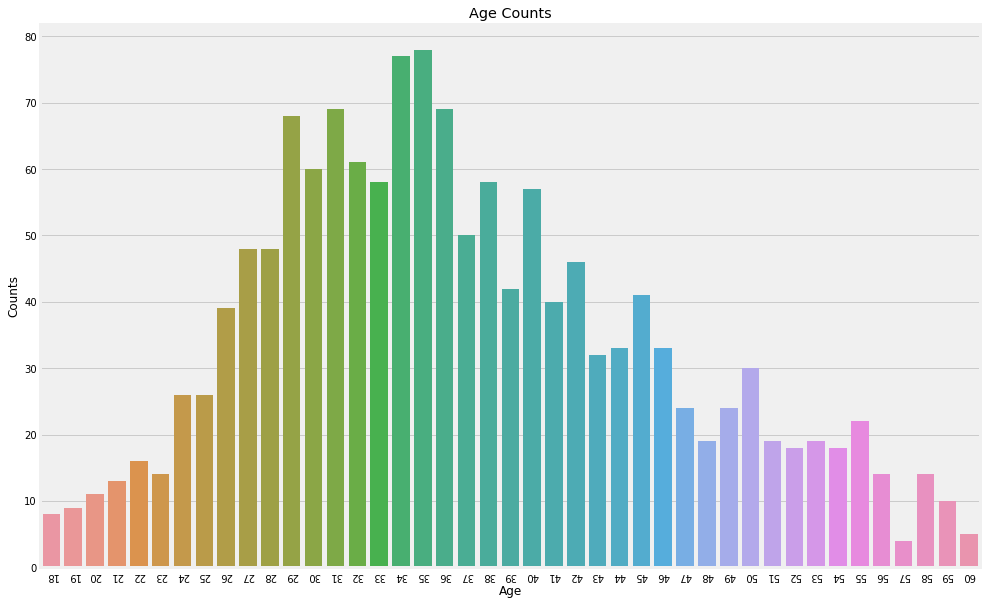

In [64]:
# showing the counts for different ages
plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.Age,y=age.Count)
plt.xticks(rotation=180)
plt.xlabel("Age")
plt.ylabel("Counts")
plt.title("Age Counts")
plt.show()

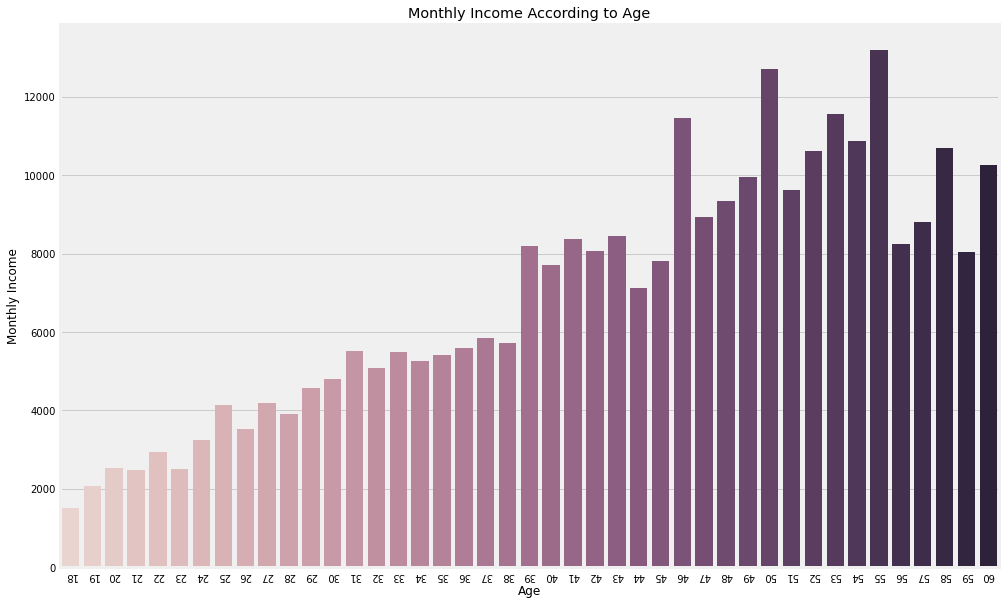

In [65]:
# showing monthly income according to age
plt.figure(figsize=(15,10))
ax=sns.barplot(x=age.Age,y=age.MonthlyIncome,palette = sns.cubehelix_palette(len(age.index)))
plt.xticks(rotation=180)
plt.xlabel("Age")
plt.ylabel("Monthly Income")
plt.title("Monthly Income According to Age")
plt.show()

In [67]:
# creating a dataframe called income based on the jobroles
income=pd.DataFrame(df.groupby("JobRole").MonthlyIncome.mean().sort_values(ascending=False))

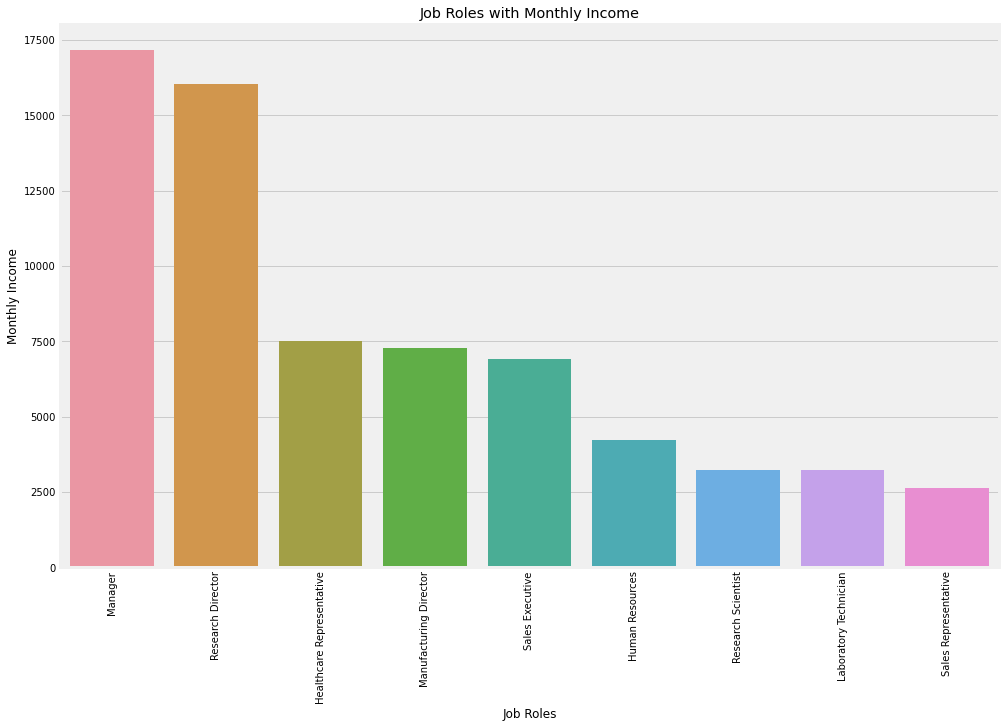

In [68]:
# showing the job roles with their monthly incomes
plt.figure(figsize=(15,10))
ax=sns.barplot(x=income.index,y=income.MonthlyIncome)
plt.xticks(rotation=90)
plt.xlabel("Job Roles")
plt.ylabel("Monthly Income")
plt.title("Job Roles with Monthly Income")
plt.show()

In [71]:
# a dataframe with mean of the selected columns grouped by job role
jobrole=pd.DataFrame(df.groupby("JobRole")["PercentSalaryHike","YearsAtCompany","TotalWorkingYears","YearsInCurrentRole","WorkLifeBalance"].mean())
jobrole

,PercentSalaryHike,YearsAtCompany,TotalWorkingYears,YearsInCurrentRole,WorkLifeBalance
JobRole,,,,,
Healthcare Representative,15.450382,8.374046,14.068702,4.862595,2.702290
Human Resources,14.807692,5.326923,8.173077,3.134615,2.923077
Laboratory Technician,15.046332,5.019305,7.656371,3.200772,2.718147
Manager,15.137255,14.431373,24.549020,6.450980,2.774510
Manufacturing Director,15.593103,7.600000,12.786207,4.972414,2.765517
Research Director,14.950000,10.937500,21.400000,6.287500,2.862500
Research Scientist,15.448630,5.113014,7.715753,3.273973,2.678082
Sales Executive,14.889571,7.496933,11.101227,4.855828,2.803681
Sales Representative,15.674699,2.915663,4.674699,2.012048,2.891566


# creating a pie chart based on the educational field

In [73]:
labels=df.EducationField.value_counts().index
labels

Index(['Life Sciences', 'Medical', 'Marketing', 'Technical Degree', 'Other',
       'Human Resources'],
      dtype='object')

In [74]:
colors=["cyan","orange","hotpink","green","navy","#9b59b6"]

In [76]:
sizes=data.EducationField.value_counts().values
sizes

array([606, 464, 159, 132,  82,  27], dtype=int64)

Text(0.5, 1.0, 'Education Field Counts')

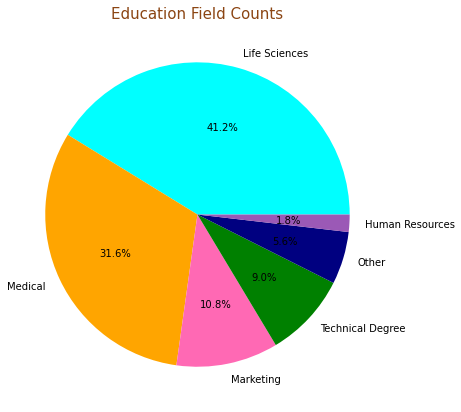

In [77]:
plt.figure(figsize=(7,7))
plt.pie(sizes,labels=labels,colors=colors,autopct="%1.1f%%")
plt.title("Education Field Counts",color="saddlebrown",fontsize=15)